<hr style="margin-bottom: 40px;">

<img src="wine.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>
    
    
# Red Wine Quality - Linear Regression Project

The dataset is related to red variants of the Portuguese "Vinho Verde" wine.

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

We are trying to predict the quality of the wine based off the variables.

## Importing the Relevant Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading and Understanding the Data

In [6]:
wines = pd.read_csv("winequality-red.csv")

**Checking the head of wines, and check out its info() and describe() methods.**

In [7]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We have no missing values in the dataset

## Exploratory Data Analysis and Variables Visualization

___


In [14]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

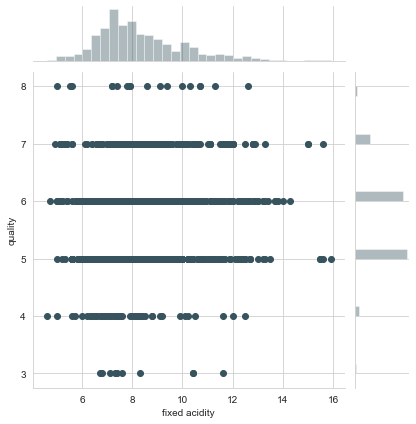

In [15]:
sns.jointplot(x='fixed acidity',y='quality',data=wines)

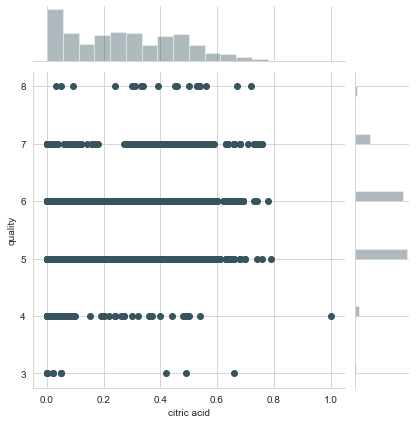

In [16]:
sns.jointplot(x='citric acid',y='quality',data=wines)

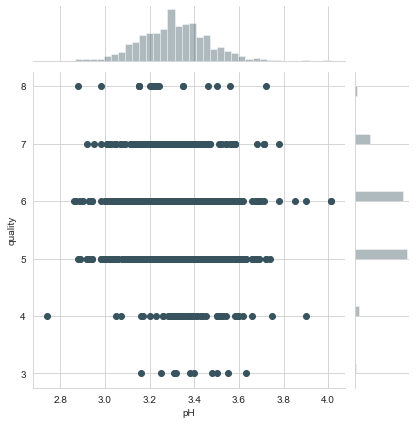

In [17]:
sns.jointplot(x='pH',y='quality',data=wines)

No correlations found.

**Exploring these types of relationships across the entire data set using pairplot**

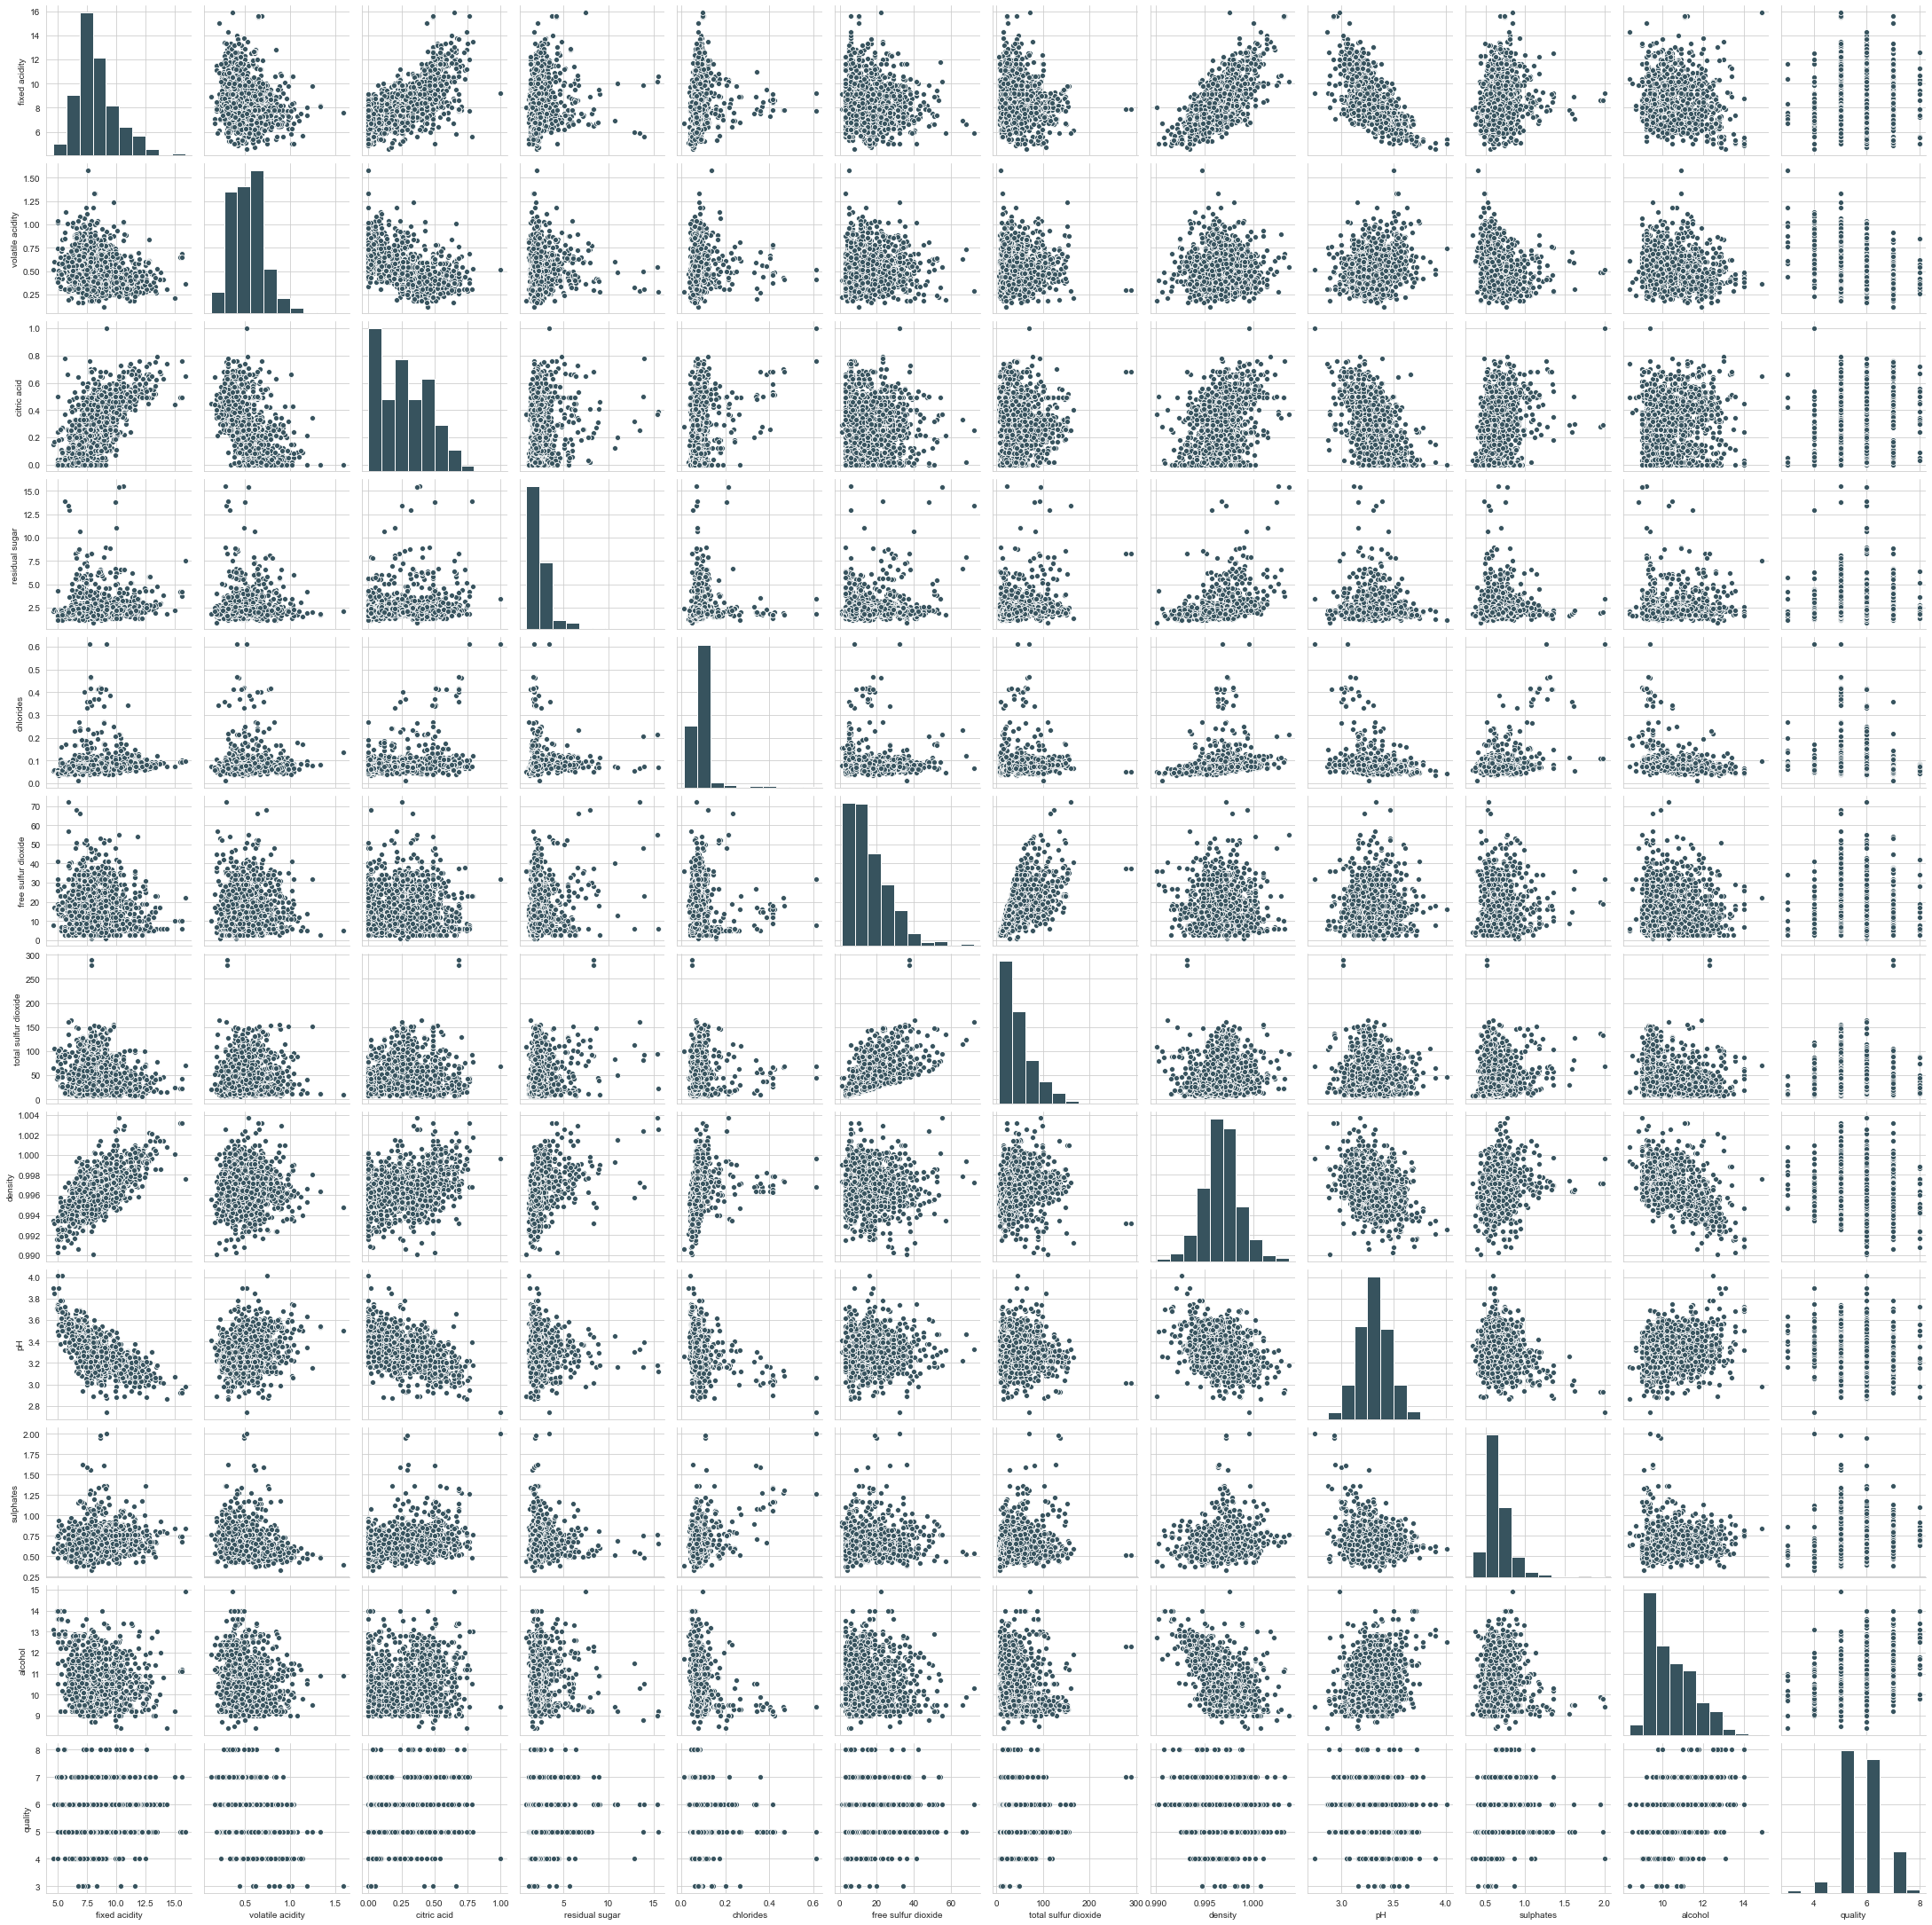

In [18]:
sns.pairplot(wines)

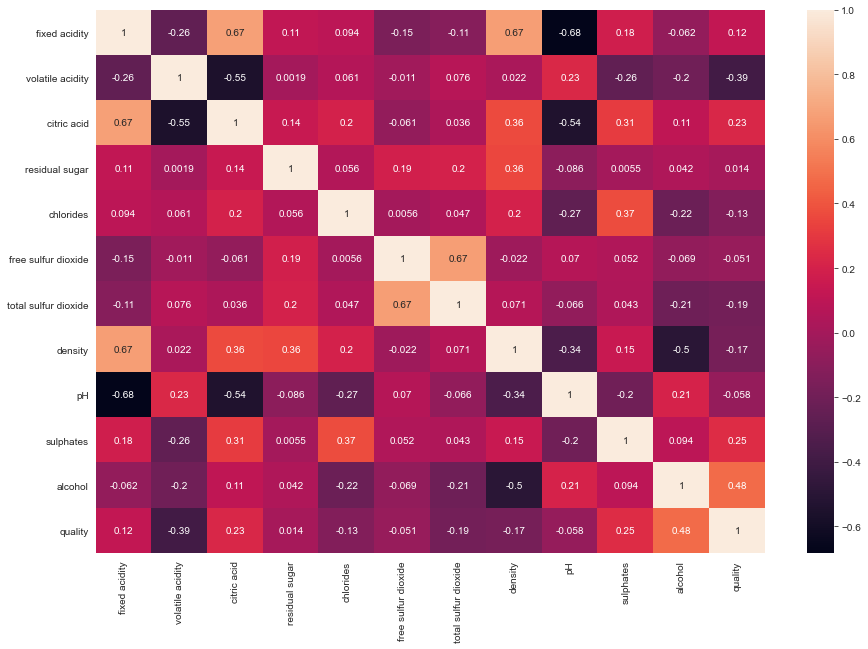

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(wines.corr(),annot=True)

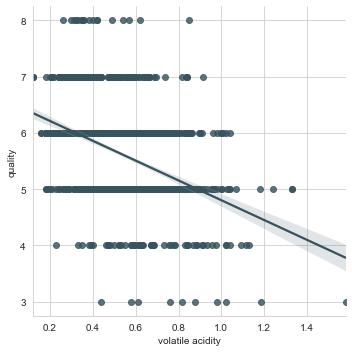

In [20]:
sns.lmplot(x='volatile acidity',y='quality',data=wines)

## Training and Testing Data

**Setting a variable X equal to the numerical features of the wines and a variable y equal to the Quality(label).**

In [21]:
y = wines['quality']

In [22]:
X = wines.drop('quality',axis=1)

**Using model_selection.train_test_split from sklearn to split the data into training and testing sets.**

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

## Training and building the Model

**Training the model of our training data by importing LinearRegression from sklearn.linear_model.**

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train,y_train)

LinearRegression()

**Printing out the coefficients of the model.**

In [29]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-2.48144990e-03 -1.30082064e+00 -1.85999720e-01  9.76855022e-03
 -2.02076816e+00  1.28235434e-03 -3.11356838e-03  2.60130461e+00
 -4.57917628e-01  9.64024381e-01  2.80573686e-01]


In [30]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
fixed acidity,-0.002481
volatile acidity,-1.300821
citric acid,-0.186000
residual sugar,0.009769
chlorides,-2.020768
free sulfur dioxide,0.001282
total sulfur dioxide,-0.003114
density,2.601305
pH,-0.457918
sulphates,0.964024


## Predicting Test Data

**Using lm.predict() to predict off the X_test set of the data.**

In [31]:
predictions = lm.predict(X_test)

**Creating a scatterplot of the real test values versus the predicted values.**

Text(0.5, 1.0, 'Actual vs Predictions')

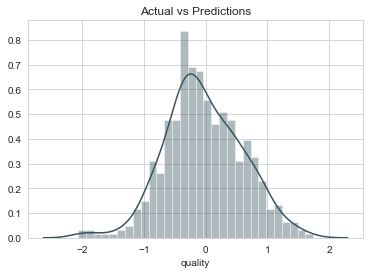

In [35]:
sns.distplot((y_test-predictions),bins=30)
plt.title('Actual vs Predictions')

The assumption of error terms being normally distributed holds good.

## Evaluating the Model

Evaluation of the model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4978386977161957
MSE: 0.3895266298369767
RMSE: 0.6241206853141279


## Residuals

**Plotting a histogram of the residuals and checking the distribution.**

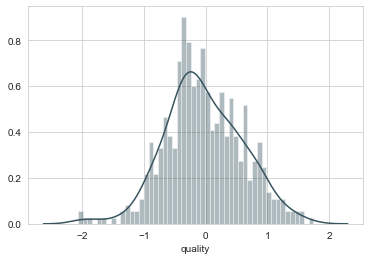

In [37]:
sns.distplot((y_test-predictions),bins=50);

**Explaining variance score (R^2).**

In [38]:
metrics.explained_variance_score(y_test,predictions)

0.33023504058296527

About de 33% of the behavior of the model it's explained by my variables, which is quite poor.

**Interpreting these coefficients.**

In [48]:
coeffecients.reset_index().rename(columns={'index': '1 unit increase','Coeffecient': 'is associated with an ncrease/decrease of quality'})

,1 unit increase,is associated with an ncrease/decrease of quality
0,fixed acidity,-0.002481
1,volatile acidity,-1.300821
2,citric acid,-0.186000
3,residual sugar,0.009769
4,chlorides,-2.020768
5,free sulfur dioxide,0.001282
6,total sulfur dioxide,-0.003114
7,density,2.601305
8,pH,-0.457918
9,sulphates,0.964024
